<a href="https://colab.research.google.com/github/lusala-louis/Hydrology-and-water-resource/blob/main/Diffusion_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wairagu Charles

**EBE 409 Assignment**

**Diffusion Model**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#Loading in the data
data = pd.read_excel("DRYING KINEMATICS DATA.xlsx")
data

,Time,MT1,MT2,MT3,MR1,MR2,MR3,MCwb1(%),MCwb2(%),MCwb3(%),MCdb1(%),MCdb2(%),MCdb3(%)
0,0,6.5,10.1,13.0,1.000000,1.000000,1.000000,0.907692,0.881188,0.853846,9.833333,7.416667,5.842105
1,15,5.5,8.3,11.8,0.846154,0.821782,0.846154,0.890909,0.855422,0.838983,8.166667,5.916667,5.210526
2,30,4.9,7.2,10.4,0.753846,0.712871,0.800000,0.877551,0.833333,0.817308,7.166667,5.000000,4.473684
3,45,4.6,6.4,8.5,0.707692,0.633663,0.653846,0.869565,0.812500,0.776471,6.666667,4.333333,3.473684
4,60,3.7,5.5,7.6,0.569231,0.544554,0.584615,0.837838,0.781818,0.750000,5.166667,3.583333,3.000000
5,75,3.1,4.6,6.4,0.476923,0.455446,0.492308,0.806452,0.739130,0.703125,4.166667,2.833333,2.368421
6,90,2.5,4.4,5.8,0.384615,0.435644,0.446154,0.760000,0.727273,0.672414,3.166667,2.666667,2.052632
7,105,2.0,3.9,4.9,0.307692,0.376923,0.376923,0.700000,0.692308,0.612245,2.333333,2.250000,1.578947
8,120,1.6,3.2,4.7,0.246154,0.361538,0.361538,0.625000,0.625000,0.595745,1.666667,1.666667,1.473684
9,135,1.3,2.8,4.6,0.200000,0.353846,0.353846,0.538462,0.571429,0.586957,1.166667,1.333333,1.421053


# Approximation of diffusion

## Declaring x and y data

In [5]:
x = data["Time"]
y = data["MR1"]

In [7]:
from scipy.optimize import curve_fit

#Page equation
def diffusion(a, b, k, t):
  yaldiz = (a*np.exp(-k*t)) + ((1 - a)*np.exp(-k*b*t))

  return yaldiz

diffusion_coefficients, diffusion_covariance = curve_fit(diffusion, x, y, p0=[0.01, 0.5, 1], maxfev= 10000)

<ipython-input-7-75d178604e1e>:5: RuntimeWarning: overflow encountered in exp
  yaldiz = (a*np.exp(-k*t)) + ((1 - a)*np.exp(-k*b*t))


In [8]:
#Diffusion coefficients
diffusion_coefficients

array([ 0.91487839, -0.35546221, -0.19988763])

In [9]:
#Fitting the curve
diffusion_fit = diffusion(x, diffusion_coefficients[0], diffusion_coefficients[1], diffusion_coefficients[2])

## Plotting the results
This is a functon that will be used to generate the plots during the analysis of the data. It helps reduce repetition of the same code.

In [10]:
#Matplotlib plot
def plot(x, y, predicted_values, title):
    fig, ax = plt.subplots(figsize =(8,4))

    ax.set_ylabel('Moisture Ratio (MR)', fontsize=16)
    ax.set_xlabel('Time', fontsize=16)

    ax.scatter(x, y, label = 'MR Curve')
    ax.scatter(x, predicted_values, label = title)
    ax.legend(loc='best', prop={'size':'large'})
    fig.suptitle('Drying Curves for'+ title, fontsize =16)
    plt.show()

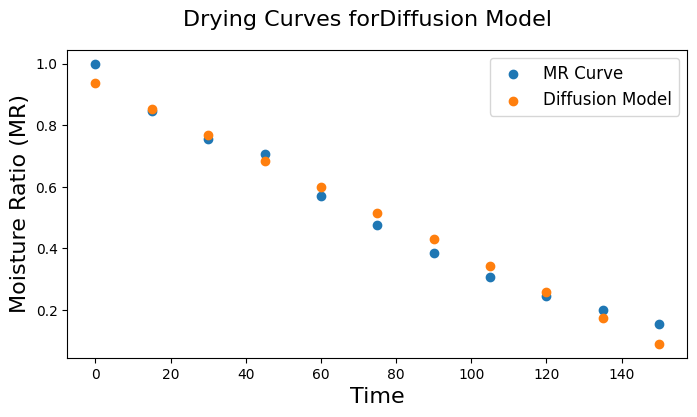

In [11]:
#Curve plotting
plot1 = plot(x, y, diffusion_fit, 'Diffusion Model')